# Neural Networks
In this notebook we will practice using the Keras library to access Google Tensorflow functionality.  This library will allow us to train and test a neural network and we will practice how to size and shape the network.  

You will need to install the tensorflow library using 
***pip install tensorflow*** in your Anaconda command window.  Make sure you use ***pip*** and not ***conda*** as the official instructions say that tensorflow is not ready to be used with conda for installation (https://www.tensorflow.org/install/pip).  
Steps:
* load the Anaconda command prompt with Administrative Rights
* type **pip install tensorflow"** and hit enter

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

# Workshop Functions
import sys
sys.path.append('..')
# from WKDSS320_functions import * 

np.random.seed(1)

### Data loading and preparation

In [2]:
# Read in the DPA datasest from Module 1
X = pd.read_csv("DPA_Data_Small.csv").values
y = pd.read_csv("DPA_target.csv", index_col=0)
y = np.array(y).ravel()

In [3]:
y

array([6, 5, 6, 2, 4, 5, 4, 5, 3, 6, 1, 7, 3, 4, 3, 4, 6, 5, 3, 2, 4, 5,
       4, 4, 4, 2, 2, 5, 4, 4, 6, 2, 2, 5, 1, 6, 4, 5, 3, 5, 6, 4, 6, 4,
       4, 6, 5, 5, 5, 5, 1, 4, 3, 7, 5, 6, 6, 4, 6, 4, 4, 6, 4, 4, 2, 4,
       2, 4, 4, 6, 6, 3, 3, 5, 4, 4, 6, 5, 3, 3, 5, 3, 5, 3, 4, 4, 2, 7,
       5, 7, 7, 6, 4, 3, 5, 2, 3, 6, 4, 5, 4, 4, 4, 5, 0, 2, 5, 3, 6, 4,
       5, 4, 7, 2, 4, 4, 5, 5, 5, 5, 2, 5, 1, 4, 4, 6, 5, 4, 3, 7, 3, 4,
       4, 4, 4, 1, 5, 5, 2, 4, 7, 6, 4, 2, 3, 4, 4, 6, 2, 5, 3, 4, 3, 4,
       4, 6, 3, 4, 3, 2, 5, 5, 6, 6, 1, 4, 7, 5, 3, 4, 6, 6, 3, 4, 2, 4,
       2, 2, 2, 5, 4, 5, 3, 4, 4, 3, 6, 1, 5, 6, 3, 4, 3, 5, 4, 5, 4, 3,
       2, 3, 4, 3, 3, 3, 5, 3, 2, 6, 2, 4, 6, 5, 5, 6, 3, 4, 3, 2, 6, 5,
       4, 3, 3, 3, 5, 3, 4, 4, 5, 3, 4, 3, 3, 7, 6, 2, 7, 4, 3, 5, 3, 3,
       5, 7, 4, 5, 2, 3, 4, 2, 3, 5, 6, 6, 4, 2, 2, 3, 3, 3, 6, 4, 2, 4,
       2, 4, 1, 7, 4, 4, 5, 3, 5, 5, 5, 5, 5, 7, 2, 5, 1, 5, 5, 4, 2, 5,
       4, 3, 5, 3, 3, 5, 4, 5, 6, 4, 4, 2, 4, 6, 4,

Remember that the DPA dataset has Radio Frequency (RF) data as observations, where each variable is the power reading at a particular time sample.  The target is one of 8 Hamming Weights, which indicate how many bits are high in the memory unit of the chip for that observation.  

Let's simplify this problem by looking at only 2 classes

In [4]:
class1 = 2
class2 = 6

In [5]:
X_2class = X[((y==class1) | (y==class2)),:]
y_2class = y[(y==class1) | (y==class2)]
X_2class.shape

(224, 59)

In [6]:
# Need to convert classes to 0 and 1
y_2class[y_2class==class1]=0
y_2class[y_2class==class2]=1

In [7]:
# Split to training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_2class, y_2class, test_size=0.3, random_state=1)

In [8]:
y_2class

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1])

We need to scale the data for the neural network training.   It's important to learn the scaling parameters with just the training set so that you can apply those to the test set.  Because in reality you will only have the training set beforehand and you would normally just learn the scaling parameters with the training set and apply it to the test set.   

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

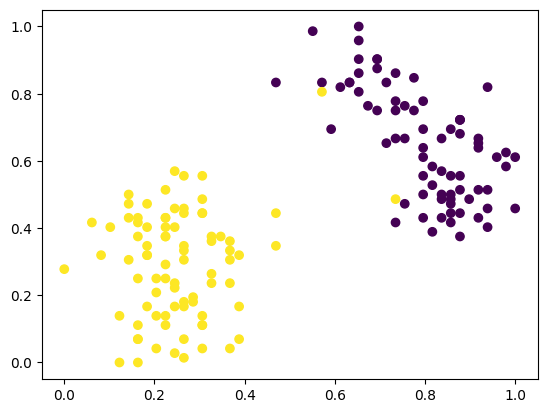

In [10]:
plt.scatter(X_train[:,2],X_train[:,3],c=y_train)
plt.show()

## Fine Tuning your Neural Network
### Validation set
Use a validation set while you are running each epoch to see how the loss on separate data is doing as you train.  This can prevent overtraining.  

In [60]:
model = Sequential()

model.add(Dense(2,activation="relu"))
model.add(Dense(2,activation="relu"))
model.add(Dense(1,activation='sigmoid'))  # Note that if you had more than 2 classes, then you could 

model.compile(optimizer="adam", loss="binary_crossentropy")

model.fit(x = X_train, y=y_train,epochs=500,validation_data=(X_test,y_test)) #training many more epochs for next section

Epoch 1/500
5/5 [==============================] - 3s 50ms/step - loss: 0.6931 - val_loss: 0.6929
Epoch 2/500
5/5 [==============================] - 0s 14ms/step - loss: 0.6931 - val_loss: 0.6927
Epoch 3/500
5/5 [==============================] - 0s 12ms/step - loss: 0.6930 - val_loss: 0.6925
Epoch 4/500
5/5 [==============================] - 0s 13ms/step - loss: 0.6930 - val_loss: 0.6923
Epoch 5/500
5/5 [==============================] - 0s 14ms/step - loss: 0.6929 - val_loss: 0.6921
Epoch 6/500
5/5 [==============================] - 0s 10ms/step - loss: 0.6929 - val_loss: 0.6920
Epoch 7/500
5/5 [==============================] - 0s 13ms/step - loss: 0.6928 - val_loss: 0.6919
Epoch 8/500
5/5 [==============================] - 0s 14ms/step - loss: 0.6929 - val_loss: 0.6917
Epoch 9/500
5/5 [==============================] - 0s 18ms/step - loss: 0.6928 - val_loss: 0.6915
Epoch 10/500
5/5 [==============================] - 0s 15ms/step - loss: 0.6928 - val_loss: 0.6914
Epoch 11/500
5/5 [=

(0.0, 0.1)

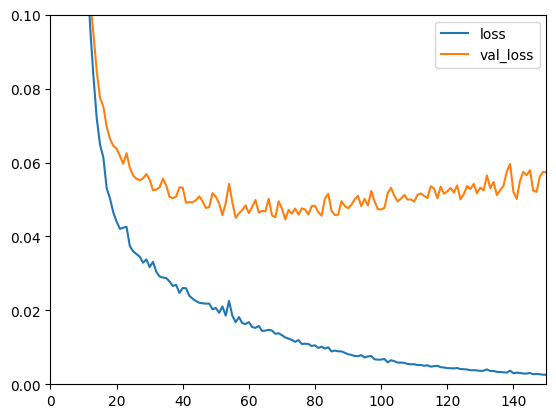

In [43]:
losses = pd.DataFrame(model.history.history)
losses.plot()
plt.xlim([0,150])
plt.ylim([0,0.1])

It looks like the validation loss starts to stop decreasing around 10 epochs and starts to increase after 60 epochs (change the xlim and ylim settings to zoom in)

### Call-backs for Early Stopping
Monitor Valudation-Loss to stop after a certain condition.  

In [44]:
from tensorflow.keras.layers import Dropout
model2 = Sequential()

model2.add(Dense(2,activation="relu"))
model2.add(Dense(2,activation="relu"))
model2.add(Dense(1,activation='sigmoid'))  # Note that if you had more than 2 classes, then you could 

model2.compile(optimizer="Adam", loss="binary_crossentropy")

In the function below:
* **monitor** is what you are ... monitoriing.  
 * In this case we are keeping an eye on the validation set loss 
* **mode** is when you want to start monitoring.  
 * In this case, we want the minimum validation loss
* **patience** is how many epochs to keep going after we notice that the val_loss has stopped going down
 * This accounts for noise between epochs

In [45]:
from tensorflow.keras.callbacks import EarlyStopping
earlyStop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=20)

In [46]:
model2.fit(x = X_train, y=y_train,epochs=500,validation_data=(X_test,y_test),callbacks=[earlyStop])

Epoch 1/500
5/5 [==============================] - 1s 65ms/step - loss: 0.6634 - val_loss: 0.5883
Epoch 2/500
5/5 [==============================] - 0s 16ms/step - loss: 0.5443 - val_loss: 0.5149
Epoch 3/500
5/5 [==============================] - 0s 18ms/step - loss: 0.4664 - val_loss: 0.4354
Epoch 4/500
5/5 [==============================] - 0s 14ms/step - loss: 0.3959 - val_loss: 0.3677
Epoch 5/500
5/5 [==============================] - 0s 15ms/step - loss: 0.3335 - val_loss: 0.3105
Epoch 6/500
5/5 [==============================] - 0s 17ms/step - loss: 0.2778 - val_loss: 0.2580
Epoch 7/500
5/5 [==============================] - 0s 17ms/step - loss: 0.2252 - val_loss: 0.2068
Epoch 8/500
5/5 [==============================] - 0s 13ms/step - loss: 0.1803 - val_loss: 0.1633
Epoch 9/500
5/5 [==============================] - 0s 13ms/step - loss: 0.1409 - val_loss: 0.1301
Epoch 10/500
5/5 [==============================] - 0s 14ms/step - loss: 0.1118 - val_loss: 0.1083
Epoch 11/500
5/5 [=

Early Stop ended the Epochs at 97

### Drop Off Neurons
Some neurons can be "turned off" during training to prevent overfitting.  These neurons pass the input directly to the output, acting as a wire.  Below we will set a certain percentage of randomly chosen neurons to turn off at each epoch.  Generally between 30% and 50% is a good setting.  

In [47]:
from tensorflow.keras.layers import Dropout

In [61]:
model = Sequential()

model.add(Dense(2,activation="relu"))
# model.add(Dropout(0.3)) # 30% of randomly chosen neurons in the layer are turned off in each epoch 

model.add(Dense(2,activation="relu"))
# model.add(Dropout(0.3))

model.add(Dense(1,activation='sigmoid'))  # Note that if you had more than 2 classes, then you could 

model.compile(optimizer="Adam", loss="binary_crossentropy")

model.fit(x = X_train, y=y_train,epochs=500,validation_data=(X_test,y_test),callbacks=[earlyStop]) #use in combination with early stopping

Epoch 1/500
5/5 [==============================] - 1s 45ms/step - loss: 0.6902 - val_loss: 0.6869
Epoch 2/500
5/5 [==============================] - 0s 14ms/step - loss: 0.6879 - val_loss: 0.6823
Epoch 3/500
5/5 [==============================] - 0s 14ms/step - loss: 0.6841 - val_loss: 0.6757
Epoch 4/500
5/5 [==============================] - 0s 13ms/step - loss: 0.6806 - val_loss: 0.6698
Epoch 5/500
5/5 [==============================] - 0s 10ms/step - loss: 0.6753 - val_loss: 0.6636
Epoch 6/500
5/5 [==============================] - 0s 14ms/step - loss: 0.6693 - val_loss: 0.6573
Epoch 7/500
5/5 [==============================] - 0s 14ms/step - loss: 0.6636 - val_loss: 0.6506
Epoch 8/500
5/5 [==============================] - 0s 9ms/step - loss: 0.6572 - val_loss: 0.6438
Epoch 9/500
5/5 [==============================] - 0s 13ms/step - loss: 0.6508 - val_loss: 0.6370
Epoch 10/500
5/5 [==============================] - 0s 12ms/step - loss: 0.6451 - val_loss: 0.6299
Epoch 11/500
5/5 [==

In [62]:
losses = pd.DataFrame(model.history.history)

Text(15, 0.4, 'Better: training and validation losses\n are closer together')

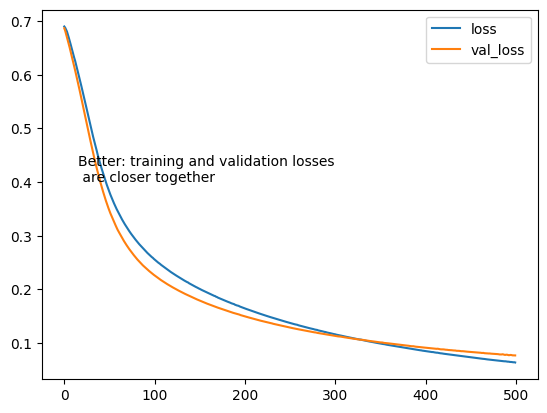

In [63]:
losses.plot()
plt.text(x=15,y=0.4,s="Better: training and validation losses\n are closer together")

Better here because training and validation loss is closer together

 ### Classification Metrics

In [64]:
ypred = model.predict(X_test)
ypred = ypred.round()

from sklearn.metrics import classification_report
print(classification_report(y_test, ypred))

3/3 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       1.00      0.98      0.99        41

    accuracy                           0.99        68
   macro avg       0.98      0.99      0.98        68
weighted avg       0.99      0.99      0.99        68



In [52]:
# Save Optimized Model
model.save("OptimizedNN.H5")